In [174]:
#Data visualization & Machine Learning & Metric Measurement.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from category_encoders import TargetEncoder

print("All necessary libraries are imported")

All necessary libraries are imported


In [97]:
df_train = pd.read_csv('predictive_maintenance.csv')
df_train.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [98]:
df_train.shape

(10000, 10)

In [99]:
df_train.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [101]:
df_train.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [102]:
target_count = df_train['Target'].value_counts()
print(target_count)

Target
0    9661
1     339
Name: count, dtype: int64


In [103]:
df_train.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [104]:
df_train.isnull().sum()
#there is no null values in each columns of our dataset.

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

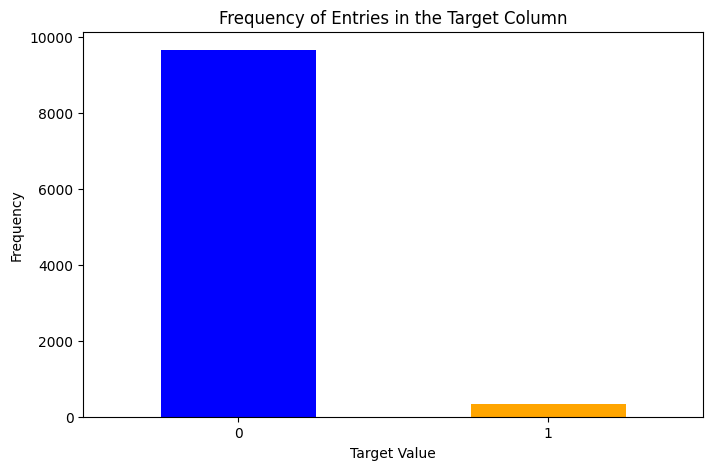

In [105]:
plt.figure(figsize=(8, 5))
target_count.plot(kind='bar', color=['blue', 'orange'])
plt.title("Frequency of Entries in the Target Column")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

In [106]:
# plt.bar(x= df_train['Failure Type'], height = )
# plt.show()

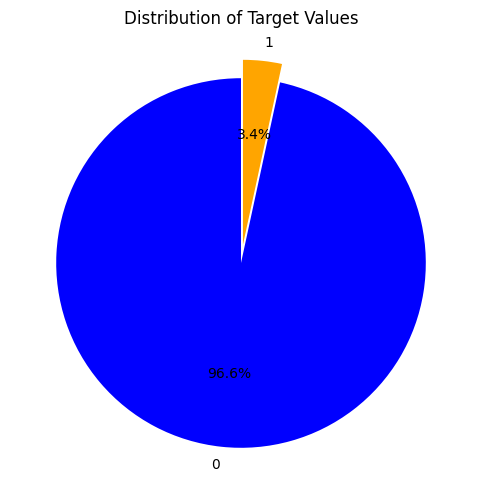

In [107]:
plt.figure(figsize=(6,6))
plt.pie(
    target_count,
    labels=target_count.index,
    autopct='%1.1f%%', 
    colors=["blue", "orange"],
    startangle=90,  # Rotate the chart
    explode=(0, 0.1),
)
plt.title("Distribution of Target Values")
plt.show()

In [108]:
df_train = df_train.drop(['UDI', 'Product ID'], axis=1)
df_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [109]:
# correlation_matrix = df_train.corr()
tool_types = {
    'M' : 2, 
    'L' : 1, 
    'H' : 3
}
# df_train['Type'] = label.fit_transform(df_train['Type'])
df_train['Type'] = df_train['Type'].map(tool_types)
df_train.iloc[9952:9956]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9952,1,298.2,307.8,1429,46.9,117,0,No Failure
9953,1,298.1,307.8,1565,35.3,119,0,No Failure
9954,2,298.1,307.9,1446,42.8,121,0,No Failure
9955,2,298.2,307.9,1462,38.8,124,0,No Failure


In [110]:
label = LabelEncoder()

In [111]:
df_train['Failure Type'] = label.fit_transform(df_train['Failure Type'])
df_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
3,1,298.2,308.6,1433,39.5,7,0,1
4,1,298.2,308.7,1408,40.0,9,0,1


In [129]:
df_train['Failure Type'].nunique()
df_train['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [117]:
x = df_train.drop(['Target'], axis = 1)
y = df_train['Target']

In [118]:
x.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
9995,2,298.8,308.4,1604,29.5,14,1
9996,3,298.9,308.4,1632,31.8,17,1
9997,2,299.0,308.6,1645,33.4,22,1
9998,3,299.0,308.7,1408,48.5,25,1
9999,2,299.0,308.7,1500,40.2,30,1


In [119]:
scaler = StandardScaler()

In [120]:
correlation_matrix = x.corr()

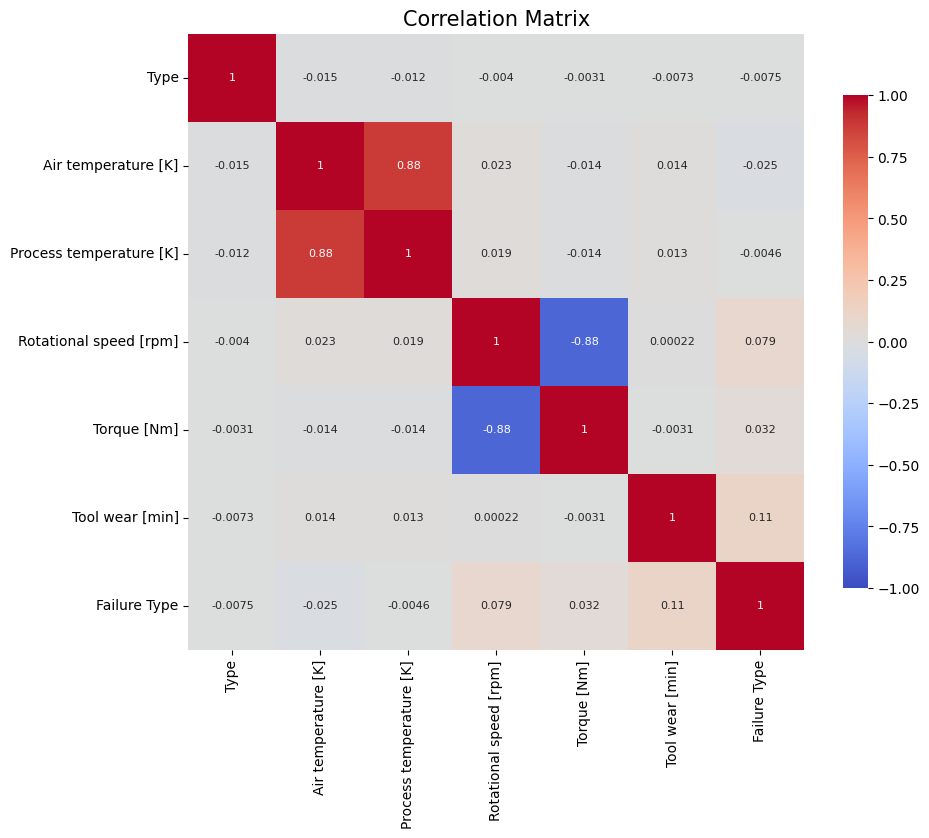

In [121]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    vmin=-1, 
    vmax=1, 
    square=True, 
    cbar_kws={"shrink": .8}, 
    annot_kws={"size": 8}
)

plt.title("Correlation Matrix", fontsize=15)
plt.show()

## Model Training 

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [124]:
x_train.shape

(8000, 7)

In [125]:
y_test.shape

(2000,)

In [130]:
training_model = LogisticRegression()
#it need to predict whether the machine will fail or not.

In [131]:
training_model.fit(x_train, y_train)

LogisticRegression()

In [133]:
y_pred_model = training_model.predict(x_test)

In [134]:
acc_score = accuracy_score(y_test, y_pred_model)

In [135]:
print(acc_score)

0.9845


In [136]:
svm_model = SVC()

In [137]:
svm_model.fit(x_train, y_train)

SVC()

In [138]:
svm_model.score(x_test,y_test)

0.97

In [139]:
svm_model_linear = SVC(kernel = 'linear')

In [140]:
svm_model_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [142]:
y_pred_svm_linear = svm_model_linear.predict(x_test)
score_svm = accuracy_score(y_test, y_pred_svm_linear)
print(score_svm)

0.986


In [170]:
random_model = RandomForestClassifier(n_estimators=300)
random_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [171]:
y_pred_rand_model = random_model.predict(x_test)

In [172]:
rand_forest_train = random_model.score(x_train, y_train)
print(rand_forest_train)

1.0


In [173]:
print(accuracy_score(y_test, y_pred_rand_model))

0.998


In [175]:
print(classification_report(y_test, y_pred_rand_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       0.97      0.97      0.97        61

    accuracy                           1.00      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       1.00      1.00      1.00      2000

